# 1.参数的更新
神经网络的学习的目的是找到使损失函数的值尽可能小的参数。这是寻找最优参数的问题，解决这个问题的过程称为最优化（optimization）。使用参数梯度，沿梯度方向更新参数，并重复这个步骤多次，从而逐渐靠近最优参数，这个过程称为**随机梯度下降法**(stochastic,gradient descent),简称**SGD**。

In [1]:
#python实现SGD类
class SGD:
    def __init__(self,lr=0.01):
        self.lr = lr
        
    def update(self,params,grads):
        for key in params.keys():
            params[key] -= self.lr*grads[key]
            
#lr表示learning rate(学习率).update方法在SGD中会被反复调用。参数params和grads是字段行变量，按params['W1']、grads['W1']的形式，
#分别保存了权重参数和梯度

### SGD的缺点
求下面这个函数的最小值问题。
<img src="img/formul6.2.gif">
如图 6-1 所示，式（6.2）表示的函数是向 x 轴方向延伸的“碗”状函数。实际上，式（6.2）的等高线呈向 x 轴方向延伸的椭圆状。
<img src="img/graph.png" width="80%">
<center>图6-1 公式6.2的图形（左图）和它的等高线（右图）</center>

如果用图表示式（6.2）的梯度，则如图 6-2 所示。这个梯度的特征是，y 轴方向上大，x 轴方向上小。
<img src="img/SGD_zhi.png" width="60%">
<center>基于 SGD 的最优化的更新路径：呈“之”字形朝最小值 (0, 0) 移动，效率低</center>

从上图看SGD 的缺点是，如果函数的形状非均向（anisotropic），比如呈延伸状，搜索的路径就会非常低效。SGD 低效的根本原因是，梯度的方向并没有指向最小值的方向。

### Momentum
Momentum 是“动量”的意思，和物理有关。

In [2]:
#python的Momentum实现
import numpy as np

class Momentum:
    def __init__(self,lr=0.01,monmentum=0.9):
        self.lr = lr
        self.monmentum = monmentum
        self.v = None
        
    def update(self,params,grads):
        if self.v is None:
            self.v={}
            for key,val in params.items():
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.monmentum*self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]
#实例变量v会保存物体的速度。初始化时，v中什么都不保存，当第一次调用update()时，v会以字典变量的形式保存与参数结构相同的数据。
#更新参数是不仅要考虑当前的梯度值，还要考虑上一次的参数更新

和 SGD 相比，我们发现“之”字形的“程度”减轻了。这是因为虽然 x 轴方向上受到的力非常小，但是一直在同一方向上受力，所以朝同一个方向会有一定的加速。反过来，虽然 y 轴方向上受到的力很大，但是因为交互地受到正方向和反方向的力，它们会互相抵消，所以 y 轴方向上的速度不稳定。
<img src="img/Momentum.png" width="60%">
<center>基于 Momentum 的最优化的更新路径</center>

### AdaGrad
AdaGrad 会为参数的每个元素适当地调整学习率，与此同时进行学习（AdaGrad 的 Ada 来自英文单词 Adaptive，即“适当的”的意思）。

In [5]:
class AdaGrad:
    def __init__(self,lr=0.01):
        self.lr = lr
        self.h = None
    
    def update(self,params,grads):
        if self.h is None:
            self.h = {}
            for key,val in params.itmes():
                self.h[key] = np.zeros_like(val)
                
            for key in params.keys():
                self.h[key] += grads[key] * grads[key]
                params[key] -= self.lr*grads[key]/(np.sqrt(self.h[key]) +1e-7)

<img src="img/AdaGrad.png" width="60%">
<center>基于 AdaGrad 的最优化的更新路径</center>

由上图的结果可知，函数的取值高效地向着最小值移动。由于 y 轴方向上的梯度较大，因此刚开始变动较大，但是后面会根据这个较大的变动按比例进行调整，减小更新的步伐。因此，y 轴方向上的更新程度被减弱，“之”字形的变动程度有所衰减。

### Adam
Adam 是 2015 年提出的新方法。它的理论有些复杂，直观地讲，就是融合了 Momentum 和 AdaGrad 的方法。通过组合前面两个方法的优点，有望实现参数空间的高效搜索。此外，进行超参数的“偏置校正”也是 Adam 的特征。
<img src="img/Adam.png" width="60%">
<center>基于 Adam 的最优化的更新路径</center>

Adam 会设置 3 个超参数。一个是学习率（论文中以 α 出现），另外两个是一次 momentum系数 β1 和二次 momentum系数 β2。根据论文，标准的设定值是 β1 为 0.9，β2 为 0.999。设置了这些值后，大多数情况下都能顺利运行。

### 使用哪种更新方法呢
<img src="img/four.png" width="80%">
<center>最优化方法的比较：SGD、Momentum、AdaGrad、Adam</center>

这 4 种方法各有各的特点，都有各自擅长解决的问题和不擅长解决的问题。

基于 MNIST 数据集的更新方法的比较

与 SGD 相比，其他 3 种方法学习得更快，而且速度基本相同，仔细看的话，AdaGrad 的学习进行得稍微快一点。这个实验需要注意的地方是，实验结果会随学习率等超参数、神经网络的结构（几层深等）的不同而发生变化。不过，一般而言，与 SGD 相比，其他 3 种方法可以学习得更快，有时最终的识别精度也更高。

# 2.权重的初始值

权重初始值不能都设为0.为了防止"权重均一化"，必须随机生成初始值。

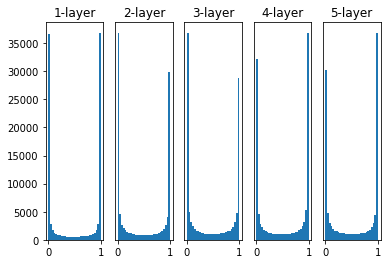

In [18]:
# coding: utf-8

#隐藏层的激活值的分布
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000个数据
node_num = 100  # 各隐藏层的节点（神经元）数
hidden_layer_size = 5  # 隐藏层有5层
activations = {}  # 激活值的结果保存在这里

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 改变初始值进行实验！
    w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 将激活函数的种类也改变，来进行实验！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 绘制直方图
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

从上图可知，各层的激活值呈偏向 0 和 1 的分布。这里使用的 sigmoid 函数是 S 型函数，随着输出不断地靠近 0（或者靠近 1），它的导数的值逐渐接近 0。因此，偏向 0 和 1 的数据分布会造成反向传播中梯度的值不断变小，最后消失。这个问题称为梯度消失（gradient vanishing）。层次加深的深度学习中，梯度消失的问题可能会更加严重。

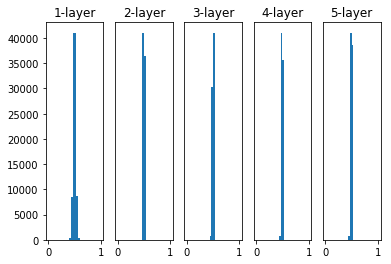

In [21]:
input_data = np.random.randn(1000, 100)  # 1000个数据
node_num = 100  # 各隐藏层的节点（神经元）数
hidden_layer_size = 5  # 隐藏层有5层
activations = {}  # 激活值的结果保存在这里

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 改变初始值进行实验！
    #w = np.random.randn(node_num, node_num) * 1
    w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 将激活函数的种类也改变，来进行实验！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 绘制直方图
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

使用标准差为0.01的高斯分布时，各层的激活值呈集中在0.5附近的分布。因为不像刚才的例子那样偏向 0 和 1，所以不会发生梯度消失的问题。但是，激活值的分布有所偏向，说明在表现力上会有很大问题。

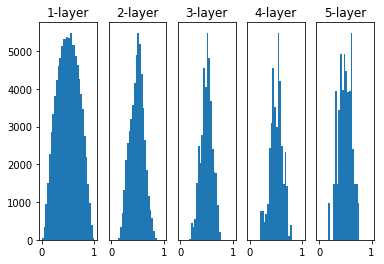

In [22]:
input_data = np.random.randn(1000, 100)  # 1000个数据
node_num = 100  # 各隐藏层的节点（神经元）数
hidden_layer_size = 5  # 隐藏层有5层
activations = {}  # 激活值的结果保存在这里

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 改变初始值进行实验！
    #w = np.random.randn(node_num, node_num) * 1
    #w = np.random.randn(node_num, node_num) * 0.01
    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num) # xavier 参数 xavier 参数
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 将激活函数的种类也改变，来进行实验！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 绘制直方图
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

使用 Xavier 初始值后的结果如上图所示。从这个结果可知，越是后面的层，图像变得越歪斜，但是呈现了比之前更有广度的分布。因为各层间传递的数据有适当的广度，所以 sigmoid 函数的表现力不受限制，有望进行高效的学习。如果用 tanh 函数（双曲线函数）代替 sigmoid 函数，这个稍微歪斜的问题就能得到改善。实际上，使用 tanh 函数后，会呈漂亮的吊钟型分布。tanh 函数和 sigmoid 函数同是 S 型曲线函数，但 tanh 函数是关于原点 (0, 0) 对称的 S 型曲线，而 sigmoid 函数是关于 (x, y)=(0, 0.5) 对称的 S 型曲线。众所周知，用作激活函数的函数最好具有关于原点对称的性质。

### ReLU的权重初始值
当激活函数使用 ReLU 时，一般推荐使用 ReLU 专用的初始值，也就是 Kaiming He 等人推荐的初始值，也称为“He 初始值”[10]。当前一层的节点数为 n 时，He 初始值使用标准差为<img src="img/he.gif"> 的高斯分布。当 Xavier 初始值是 <img src="img/he.gif"> 时，（直观上）可以解释为，因为 ReLU 的负值区域的值为 0，为了使它更有广度，所以需要 2 倍的系数。

总结一下，当激活函数使用 ReLU 时，权重初始值使用 He 初始值，当激活函数为 sigmoid 或 tanh 等 S 型曲线函数时，初始值使用 Xavier 初始值。这是目前的最佳实践。

===========iteration:0===========
std=0.01:2.302497361937778
Xavier:2.3059730713183457
He:2.3751312466314602
===========iteration:100===========
std=0.01:2.3018090765099655
Xavier:2.219919371347601
He:1.581503342389745
===========iteration:200===========
std=0.01:2.302192657653113
Xavier:2.050051303509106
He:0.788586424298725
===========iteration:300===========
std=0.01:2.302496809807316
Xavier:1.6044855098582596
He:0.6927808012215093
===========iteration:400===========
std=0.01:2.30234195211392
Xavier:1.2197759461176811
He:0.6193675488792343
===========iteration:500===========
std=0.01:2.3037807329890514
Xavier:0.7377121011787467
He:0.36368103326224854
===========iteration:600===========
std=0.01:2.3020404282129703
Xavier:0.6217607471653376
He:0.3167549217915636
===========iteration:700===========
std=0.01:2.299527171078318
Xavier:0.47188737670667147
He:0.3104395597964348
===========iteration:800===========
std=0.01:2.29898006543129
Xavier:0.41316730812594354
He:0.305808463801581
====

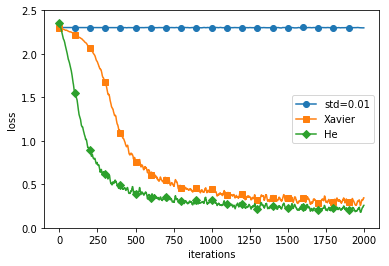

In [23]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0:读入MNIST数据==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:进行实验的设置==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2:开始训练==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.绘制图形==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

这个实验中，神经网络有 5 层，每层有 100 个神经元，激活函数使用的是 ReLU。从图的结果可知，std = 0.01 时完全无法进行学习。这和刚才观察到的激活值的分布一样，是因为正向传播中传递的值很小（集中在 0 附近的数据）。因此，逆向传播时求到的梯度也很小，权重几乎不进行更新。相反，当权重初始值为 Xavier 初始值和 He 初始值时，学习进行得很顺利。并且，我们发现 He 初始值时的学习进度更快一些。

# 3.Batch Normalization

BatchNormalization是2015年提出的方法。有以下优点：
* 可以使学习快速进行（可以增大学习率）。
* 不那么依赖初始值（对于初始值不用那么神经质）。
* 抑制过拟合（降低 Dropout 等的必要性）。

============== 1/16 ==============
epoch:0 | 0.099 - 0.116


E:\machineLearing\DeepLearningTrainingCamp\common\layers.py:12: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (x <= 0)
E:\machineLearing\DeepLearningTrainingCamp\common\multi_layer_net_extend.py:101: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
E:\machineLearing\DeepLearningTrainingCamp\common\multi_layer_net_extend.py:101: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:1 | 0.097 - 0.104
epoch:2 | 0.097 - 0.119
epoch:3 | 0.097 - 0.146
epoch:4 | 0.097 - 0.162
epoch:5 | 0.097 - 0.179
epoch:6 | 0.097 - 0.203
epoch:7 | 0.097 - 0.219
epoch:8 | 0.097 - 0.233
epoch:9 | 0.097 - 0.261
epoch:10 | 0.097 - 0.278
epoch:11 | 0.097 - 0.289
epoch:12 | 0.097 - 0.312
epoch:13 | 0.097 - 0.326
epoch:14 | 0.097 - 0.335
epoch:15 | 0.097 - 0.359
epoch:16 | 0.097 - 0.368
epoch:17 | 0.097 - 0.379
epoch:18 | 0.097 - 0.392


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.406
============== 2/16 ==============
epoch:0 | 0.087 - 0.128


E:\machineLearing\DeepLearningTrainingCamp\common\functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)


epoch:1 | 0.097 - 0.109
epoch:2 | 0.097 - 0.122
epoch:3 | 0.097 - 0.15
epoch:4 | 0.097 - 0.182
epoch:5 | 0.097 - 0.205
epoch:6 | 0.097 - 0.233
epoch:7 | 0.097 - 0.267
epoch:8 | 0.097 - 0.294
epoch:9 | 0.097 - 0.317
epoch:10 | 0.097 - 0.348
epoch:11 | 0.097 - 0.362
epoch:12 | 0.097 - 0.395
epoch:13 | 0.097 - 0.418
epoch:14 | 0.097 - 0.446
epoch:15 | 0.097 - 0.465
epoch:16 | 0.097 - 0.481
epoch:17 | 0.097 - 0.503
epoch:18 | 0.097 - 0.516


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.532
============== 3/16 ==============
epoch:0 | 0.1 - 0.122
epoch:1 | 0.396 - 0.121
epoch:2 | 0.547 - 0.168
epoch:3 | 0.616 - 0.207
epoch:4 | 0.715 - 0.262
epoch:5 | 0.773 - 0.297
epoch:6 | 0.817 - 0.336
epoch:7 | 0.866 - 0.371
epoch:8 | 0.899 - 0.411
epoch:9 | 0.916 - 0.436
epoch:10 | 0.934 - 0.471
epoch:11 | 0.95 - 0.49
epoch:12 | 0.955 - 0.516
epoch:13 | 0.961 - 0.538
epoch:14 | 0.972 - 0.561
epoch:15 | 0.978 - 0.588
epoch:16 | 0.979 - 0.606
epoch:17 | 0.983 - 0.628
epoch:18 | 0.982 - 0.632


No handles with labels found to put in legend.


epoch:19 | 0.987 - 0.657
============== 4/16 ==============
epoch:0 | 0.155 - 0.085
epoch:1 | 0.354 - 0.109
epoch:2 | 0.51 - 0.179
epoch:3 | 0.591 - 0.275
epoch:4 | 0.642 - 0.34
epoch:5 | 0.674 - 0.405
epoch:6 | 0.716 - 0.465
epoch:7 | 0.721 - 0.508
epoch:8 | 0.774 - 0.54
epoch:9 | 0.783 - 0.585
epoch:10 | 0.797 - 0.634
epoch:11 | 0.811 - 0.652
epoch:12 | 0.823 - 0.679
epoch:13 | 0.845 - 0.7
epoch:14 | 0.848 - 0.724
epoch:15 | 0.863 - 0.729
epoch:16 | 0.868 - 0.757
epoch:17 | 0.874 - 0.769
epoch:18 | 0.859 - 0.78


No handles with labels found to put in legend.


epoch:19 | 0.887 - 0.788
============== 5/16 ==============
epoch:0 | 0.114 - 0.085
epoch:1 | 0.12 - 0.127
epoch:2 | 0.138 - 0.297
epoch:3 | 0.135 - 0.424
epoch:4 | 0.148 - 0.504
epoch:5 | 0.162 - 0.562
epoch:6 | 0.19 - 0.614
epoch:7 | 0.198 - 0.666
epoch:8 | 0.207 - 0.7
epoch:9 | 0.215 - 0.73
epoch:10 | 0.222 - 0.761
epoch:11 | 0.229 - 0.784
epoch:12 | 0.236 - 0.8
epoch:13 | 0.245 - 0.819
epoch:14 | 0.239 - 0.835
epoch:15 | 0.237 - 0.852
epoch:16 | 0.243 - 0.857
epoch:17 | 0.247 - 0.872
epoch:18 | 0.248 - 0.88


No handles with labels found to put in legend.


epoch:19 | 0.258 - 0.89
============== 6/16 ==============
epoch:0 | 0.066 - 0.101
epoch:1 | 0.093 - 0.18
epoch:2 | 0.094 - 0.38
epoch:3 | 0.118 - 0.55
epoch:4 | 0.131 - 0.643
epoch:5 | 0.119 - 0.695
epoch:6 | 0.117 - 0.744
epoch:7 | 0.118 - 0.79
epoch:8 | 0.152 - 0.817
epoch:9 | 0.152 - 0.833
epoch:10 | 0.153 - 0.854
epoch:11 | 0.158 - 0.875
epoch:12 | 0.137 - 0.888
epoch:13 | 0.155 - 0.889
epoch:14 | 0.116 - 0.901
epoch:15 | 0.116 - 0.912
epoch:16 | 0.117 - 0.915
epoch:17 | 0.116 - 0.927
epoch:18 | 0.116 - 0.935


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.943
============== 7/16 ==============
epoch:0 | 0.105 - 0.086
epoch:1 | 0.122 - 0.309
epoch:2 | 0.116 - 0.605
epoch:3 | 0.116 - 0.723
epoch:4 | 0.116 - 0.764
epoch:5 | 0.116 - 0.793
epoch:6 | 0.116 - 0.812
epoch:7 | 0.116 - 0.846
epoch:8 | 0.116 - 0.868
epoch:9 | 0.116 - 0.887
epoch:10 | 0.116 - 0.908
epoch:11 | 0.116 - 0.939
epoch:12 | 0.116 - 0.947
epoch:13 | 0.116 - 0.96
epoch:14 | 0.116 - 0.967
epoch:15 | 0.117 - 0.974
epoch:16 | 0.117 - 0.98
epoch:17 | 0.117 - 0.982
epoch:18 | 0.117 - 0.987


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.99
============== 8/16 ==============
epoch:0 | 0.083 - 0.164
epoch:1 | 0.105 - 0.513
epoch:2 | 0.105 - 0.707
epoch:3 | 0.116 - 0.776
epoch:4 | 0.116 - 0.843
epoch:5 | 0.116 - 0.894
epoch:6 | 0.116 - 0.919
epoch:7 | 0.116 - 0.94
epoch:8 | 0.116 - 0.958
epoch:9 | 0.116 - 0.969
epoch:10 | 0.116 - 0.979
epoch:11 | 0.116 - 0.988
epoch:12 | 0.116 - 0.992
epoch:13 | 0.116 - 0.993
epoch:14 | 0.116 - 0.995
epoch:15 | 0.116 - 0.997
epoch:16 | 0.116 - 0.998
epoch:17 | 0.116 - 1.0
epoch:18 | 0.116 - 0.998


No handles with labels found to put in legend.


epoch:19 | 0.116 - 1.0
============== 9/16 ==============
epoch:0 | 0.087 - 0.126
epoch:1 | 0.116 - 0.366
epoch:2 | 0.116 - 0.65
epoch:3 | 0.116 - 0.759
epoch:4 | 0.116 - 0.865
epoch:5 | 0.116 - 0.868
epoch:6 | 0.116 - 0.886
epoch:7 | 0.117 - 0.897
epoch:8 | 0.117 - 0.916
epoch:9 | 0.117 - 0.943
epoch:10 | 0.117 - 0.96
epoch:11 | 0.117 - 0.992
epoch:12 | 0.117 - 0.993
epoch:13 | 0.117 - 0.996
epoch:14 | 0.117 - 0.997
epoch:15 | 0.117 - 0.998
epoch:16 | 0.117 - 0.998
epoch:17 | 0.117 - 1.0
epoch:18 | 0.117 - 1.0


No handles with labels found to put in legend.


epoch:19 | 0.117 - 1.0
============== 10/16 ==============
epoch:0 | 0.1 - 0.134
epoch:1 | 0.105 - 0.645
epoch:2 | 0.116 - 0.768
epoch:3 | 0.116 - 0.829
epoch:4 | 0.117 - 0.903
epoch:5 | 0.117 - 0.933
epoch:6 | 0.117 - 0.946
epoch:7 | 0.117 - 0.978
epoch:8 | 0.117 - 0.978
epoch:9 | 0.117 - 0.983
epoch:10 | 0.117 - 0.988
epoch:11 | 0.117 - 0.991
epoch:12 | 0.117 - 0.995
epoch:13 | 0.117 - 0.989
epoch:14 | 0.117 - 0.998
epoch:15 | 0.117 - 0.996
epoch:16 | 0.117 - 0.998
epoch:17 | 0.117 - 0.998
epoch:18 | 0.117 - 0.998


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.998
============== 11/16 ==============
epoch:0 | 0.097 - 0.279
epoch:1 | 0.116 - 0.562
epoch:2 | 0.116 - 0.617
epoch:3 | 0.116 - 0.648
epoch:4 | 0.116 - 0.773
epoch:5 | 0.116 - 0.678
epoch:6 | 0.117 - 0.832
epoch:7 | 0.117 - 0.81
epoch:8 | 0.117 - 0.937
epoch:9 | 0.117 - 0.909
epoch:10 | 0.117 - 0.958
epoch:11 | 0.117 - 0.942
epoch:12 | 0.117 - 0.924
epoch:13 | 0.117 - 0.884
epoch:14 | 0.117 - 0.883
epoch:15 | 0.117 - 0.958
epoch:16 | 0.117 - 0.986
epoch:17 | 0.117 - 0.991
epoch:18 | 0.117 - 0.992


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.991
============== 12/16 ==============
epoch:0 | 0.117 - 0.179
epoch:1 | 0.117 - 0.461
epoch:2 | 0.117 - 0.629
epoch:3 | 0.117 - 0.598
epoch:4 | 0.117 - 0.735
epoch:5 | 0.117 - 0.817
epoch:6 | 0.117 - 0.866
epoch:7 | 0.117 - 0.876
epoch:8 | 0.117 - 0.848
epoch:9 | 0.117 - 0.87
epoch:10 | 0.117 - 0.871
epoch:11 | 0.117 - 0.94
epoch:12 | 0.117 - 0.982
epoch:13 | 0.117 - 0.986
epoch:14 | 0.117 - 0.984
epoch:15 | 0.117 - 0.99
epoch:16 | 0.117 - 0.989
epoch:17 | 0.117 - 0.99
epoch:18 | 0.117 - 0.977


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.991
============== 13/16 ==============
epoch:0 | 0.099 - 0.202
epoch:1 | 0.117 - 0.376
epoch:2 | 0.117 - 0.456
epoch:3 | 0.116 - 0.489
epoch:4 | 0.116 - 0.511
epoch:5 | 0.116 - 0.492
epoch:6 | 0.117 - 0.523
epoch:7 | 0.117 - 0.525
epoch:8 | 0.116 - 0.512
epoch:9 | 0.116 - 0.524
epoch:10 | 0.116 - 0.512
epoch:11 | 0.116 - 0.525
epoch:12 | 0.116 - 0.524
epoch:13 | 0.116 - 0.524
epoch:14 | 0.116 - 0.526
epoch:15 | 0.116 - 0.526
epoch:16 | 0.116 - 0.527
epoch:17 | 0.116 - 0.517
epoch:18 | 0.116 - 0.526


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.558
============== 14/16 ==============
epoch:0 | 0.105 - 0.097
epoch:1 | 0.117 - 0.395
epoch:2 | 0.117 - 0.478
epoch:3 | 0.117 - 0.482
epoch:4 | 0.116 - 0.494
epoch:5 | 0.116 - 0.521
epoch:6 | 0.117 - 0.463
epoch:7 | 0.117 - 0.545
epoch:8 | 0.117 - 0.601
epoch:9 | 0.117 - 0.59
epoch:10 | 0.117 - 0.589
epoch:11 | 0.117 - 0.589
epoch:12 | 0.117 - 0.616
epoch:13 | 0.117 - 0.612
epoch:14 | 0.117 - 0.617
epoch:15 | 0.116 - 0.608
epoch:16 | 0.116 - 0.62
epoch:17 | 0.116 - 0.621
epoch:18 | 0.116 - 0.564


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.62
============== 15/16 ==============
epoch:0 | 0.116 - 0.171
epoch:1 | 0.116 - 0.311
epoch:2 | 0.116 - 0.401
epoch:3 | 0.116 - 0.493
epoch:4 | 0.116 - 0.479
epoch:5 | 0.116 - 0.498
epoch:6 | 0.116 - 0.509
epoch:7 | 0.116 - 0.506
epoch:8 | 0.117 - 0.507
epoch:9 | 0.117 - 0.476
epoch:10 | 0.117 - 0.56
epoch:11 | 0.117 - 0.589
epoch:12 | 0.117 - 0.594
epoch:13 | 0.117 - 0.585
epoch:14 | 0.117 - 0.603
epoch:15 | 0.117 - 0.593
epoch:16 | 0.117 - 0.622
epoch:17 | 0.117 - 0.624
epoch:18 | 0.117 - 0.615


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.622
============== 16/16 ==============
epoch:0 | 0.117 - 0.115
epoch:1 | 0.116 - 0.318
epoch:2 | 0.117 - 0.318
epoch:3 | 0.117 - 0.394
epoch:4 | 0.117 - 0.398
epoch:5 | 0.117 - 0.405
epoch:6 | 0.117 - 0.378
epoch:7 | 0.117 - 0.412
epoch:8 | 0.117 - 0.424
epoch:9 | 0.116 - 0.42
epoch:10 | 0.116 - 0.429
epoch:11 | 0.116 - 0.416
epoch:12 | 0.116 - 0.433
epoch:13 | 0.116 - 0.457
epoch:14 | 0.116 - 0.441
epoch:15 | 0.116 - 0.452
epoch:16 | 0.116 - 0.481
epoch:17 | 0.116 - 0.436
epoch:18 | 0.116 - 0.495
epoch:19 | 0.116 - 0.503


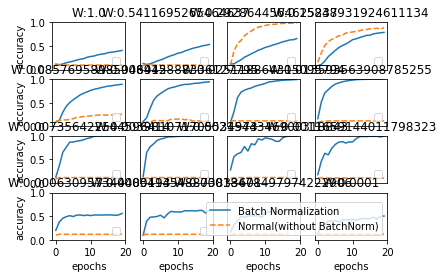

In [25]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 减少学习数据
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 3.绘制图形==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()